# NM assignment 3

#### Name :Mohammed Thabrez G
#### Roll No: 2020115051
#### College: College of Engineering, Guindy


# Importing Libraries

In [1]:
from tensorflow import keras
import tensorflow as tf

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Model
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
# from keras.preprocessing.image import load_img
from keras.utils import load_img,img_to_array

# Data Augmentation

In [2]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    zoom_range=0.2,
                                    shear_range=0.2,
                                    horizontal_flip=True,
                                    validation_split=0.2)

path = 'C:\\Users\\Admin\\Desktop\\studymats\\Sem6\\NM\\assignments\\animals\\animals'
train_dataset = data_generator.flow_from_directory(directory=path,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    subset='training')
val_dataset = data_generator.flow_from_directory(directory=path,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  subset='validation')

Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.


# Defining Model

In [3]:
model = keras.Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(32,activation='relu'),
    Dense(128, activation='relu'),
    Dense(90, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 32)                5

In [4]:
history = model.fit(train_dataset,epochs=30,validation_data=val_dataset)

Epoch 1/30
135/135 [==============================] - 189s 1s/step - loss: 4.4974 - accuracy: 0.0171 - val_loss: 4.3449 - val_accuracy: 0.0241
Epoch 2/30
135/135 [==============================] - 151s 1s/step - loss: 4.2946 - accuracy: 0.0322 - val_loss: 4.2963 - val_accuracy: 0.0343
Epoch 3/30
135/135 [==============================] - 145s 1s/step - loss: 4.2122 - accuracy: 0.0387 - val_loss: 4.1896 - val_accuracy: 0.0537
Epoch 4/30
135/135 [==============================] - 151s 1s/step - loss: 4.1031 - accuracy: 0.0560 - val_loss: 4.1131 - val_accuracy: 0.0546
Epoch 5/30
135/135 [==============================] - 156s 1s/step - loss: 4.0041 - accuracy: 0.0606 - val_loss: 4.0654 - val_accuracy: 0.0537
Epoch 6/30
135/135 [==============================] - 151s 1s/step - loss: 3.8948 - accuracy: 0.0778 - val_loss: 3.9719 - val_accuracy: 0.0704
Epoch 7/30
135/135 [==============================] - 150s 1s/step - loss: 3.8121 - accuracy: 0.0919 - val_loss: 4.0196 - val_accuracy: 0.0722

In [5]:
model.save('animals.h5')

In [7]:
import matplotlib.pyplot as plt

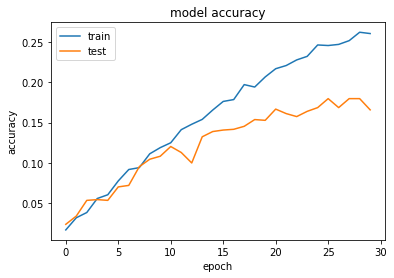

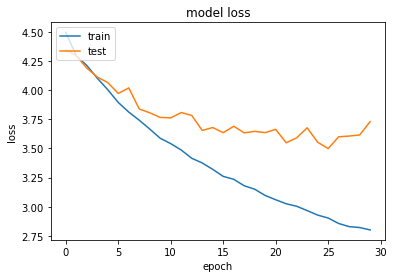

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Testing the Model

1/1 [==============================] - 0s 17ms/step


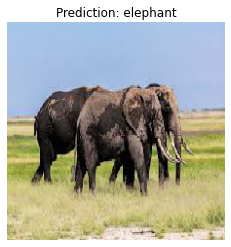

1/1 [==============================] - 0s 18ms/step


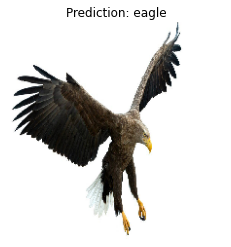

1/1 [==============================] - 0s 20ms/step


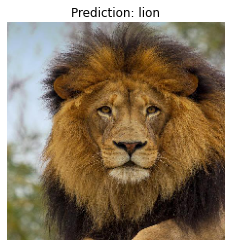

1/1 [==============================] - 0s 22ms/step


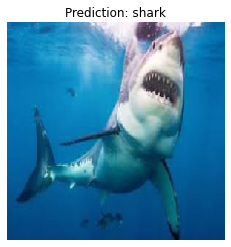

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
class_labels = list(train_dataset.class_indices.keys())
path = 'C:\\Users\\Admin\\Desktop\\studymats\\Sem6\\NM\\assignments\\animals\\animals'
imgs=['\\elephant\\2efd71c54e.jpg','\\eagle\\3df1379a57.jpg','\\lion\\2d670c088a.jpg','\\shark\\30b3cbf355.jpg']
for paths in imgs:
    img = load_img(path+paths, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]

    plt.imshow(img)
    plt.title('Prediction: {}'.format(predicted_class))
    plt.axis('off')
    plt.show()